In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [6]:
plt.style.use('seaborn-notebook')
plt.style.use('ggplot')

# 6.2 Programming fake-data simulation

In [7]:
def sim_fake(a,b,n,sigma):
    x = np.random.uniform(0,100,n)
    error = np.random.normal(0,sigma,n)
    y = a+b*x + error
    return x, y

In [8]:
x,y = sim_fake(2,5,1000,0.5)

In [9]:
x.shape

(1000,)

In [10]:
y.shape

(1000,)

In [11]:
coeff = np.polyfit(x,y,2)

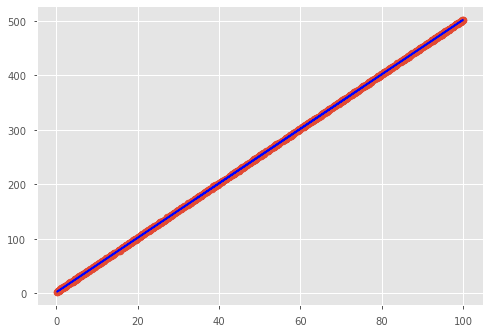

In [12]:
plt.scatter(x,y)
plt.plot(x, np.polyval(coeff, x), color='b')

try scikitlearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(x.reshape((-1,1)),y.reshape((-1,1)))

LinearRegression()

In [15]:
model.score(x.reshape((-1,1)),y.reshape((-1,1)))

0.9999879087397832

In [16]:
model.intercept_

array([2.01516854])

In [17]:
model.coef_

array([[4.99949221]])

In [18]:
coeff

array([4.02753432e-05, 4.99547336e+00, 2.08013954e+00])

Actually we want to use something that gives us errors

In [19]:
import statsmodels.api as sm

In [20]:
X = sm.add_constant(x)

In [21]:
lr_model = sm.OLS(y,X) #endo = dependent = y

In [22]:
lr_results = lr_model.fit()
lr_results.params

array([2.01516854, 4.99949221])

In [23]:
lr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.254e+07
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        20:40:20   Log-Likelihood:                -754.39
No. Observations:                1000   AIC:                             1513.
Df Residuals:                     998   BIC:                             1523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0152      0.032     62.756      0.000       1.952       2.078
x1             4.9995      0.001   9085.040      0.000       4.998       5.001
==============================================================================
Omnibus:                        2.747   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.748
Skew:                          -0.099   Prob(JB):                        0.253
Kurtosis:                       2.835   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6.3 variation, uncertainty and sample size

In [24]:
x2,y2 = sim_fake(2,5,5000,0.5)

In [25]:
X2 = sm.add_constant(x2)

In [26]:
lr_model2 = sm.OLS(y2,X2) #endo = dependent = y

In [27]:
res = sm.OLS(y2, x2).fit()

In [28]:
lr_results = lr_model2.fit()
lr_results.params

array([1.99369645, 5.00018587])

In [29]:
lr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.177e+08
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        20:40:21   Log-Likelihood:                -3628.7
No. Observations:                5000   AIC:                             7261.
Df Residuals:                    4998   BIC:                             7274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9937      0.014    141.006      0.000       1.966       2.021
x1             5.0002      0.000   2.04e+04      0.000       5.000       5.001
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.458
Skew:                          -0.011   Prob(JB):                        0.795
Kurtosis:                       2.959   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

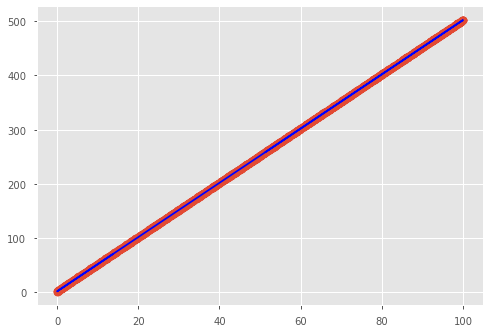

In [30]:
plt.scatter(x2,y2)
plt.plot(x2, lr_results.params[0]+lr_results.params[1]*x2,color='b')

# 6.4 Simulation Study 

In [31]:
lr_results.bse

array([0.0141391 , 0.00024466])

In [32]:
lr_results.bse[0]

0.014139096980878023

In [33]:
lr_results.bse[1]

0.0002446585643125412

In [34]:
n_list = [100,1000,2000,5000,10000]
a_bse_list = []
b_bse_list = []
for n in n_list:
    x_n, y_n = sim_fake(2,5,n,0.5)
    X_n = sm.add_constant(x_n)
    res = sm.OLS(y_n,X_n).fit()
    # y = a+b*x
    a_bse_list.append(res.bse[0])
    b_bse_list.append(res.bse[1])

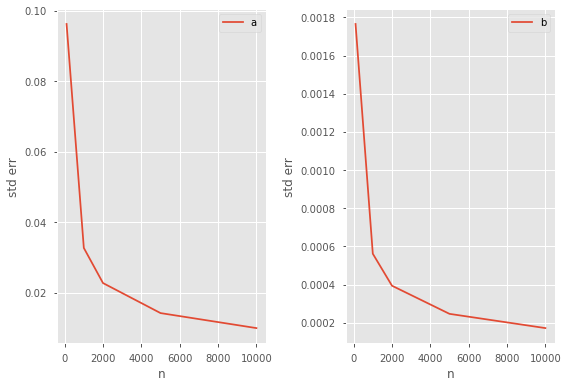

In [35]:
fig, ax = plt.subplots(1,2)
ax[0].plot(n_list, a_bse_list, label='a')
ax[1].plot(n_list, b_bse_list, label='b')
ax[1].legend()
ax[1].set_xlabel('n')
ax[0].set_xlabel('n')
ax[1].set_ylabel('std err')
ax[0].set_ylabel('std err')
ax[0].legend()
plt.tight_layout()

# 6.5 Regression prediction and averages

In [36]:
earnings = pd.read_csv('../ROS-Examples/Earnings/data/earnings.csv')

In [37]:
earnings.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [38]:
avg_male_height  = earnings.query('male == 1')['height'].mean()
avg_female_height= earnings.query('male == 0')['height'].mean()

In [39]:
avg_female_height

64.48641542506573

In [40]:
avg_male_height


70.08888888888889

In [41]:
import statsmodels.formula.api as smf

In [42]:
model = smf.glm('earnk ~ height + male', data=earnings)

In [43]:
res=model.fit()

In [44]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  earnk   No. Observations:                 1816
Model:                            GLM   Df Residuals:                     1813
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          457.61
Method:                          IRLS   Log-Likelihood:                -8137.7
Date:                Wed, 12 May 2021   Deviance:                   8.2965e+05
Time:                        20:40:24   Pearson chi2:                 8.30e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.8722     11.962     -2.163      0.031     -49.316      -2.428
height         0.6470      0.185      3.493      0.000       0.284       1.010
male          10.6327      1.468      7.241      0.000       7.755      13.510
==============================================================================
"""

In [45]:
res.resid_deviance.std()

21.380070633991032

This is the auxiliary sigma

In [46]:
res.params

Intercept   -25.872186
height        0.646960
male         10.632669
dtype: float64

Matches the book (p.84)

In [47]:
avg_female_earnk = res.predict(exog={'height':avg_female_height, 'male':0})[0]
avg_female_earnk

15.847935144609956

In [48]:
#just checking the API
0.646960*avg_female_height-25.872186

15.847945323400523

In [49]:
avg_male_earnk = res.predict(exog={'height':avg_male_height, 'male':1})[0]
avg_male_earnk

30.105179259259202

In [50]:
#assume 52% of the population are women, estimate the avg earning in total population

0.52*avg_female_earnk+0.48*avg_male_earnk

22.691412319641593

In [51]:
#now compute from sample data

In [52]:
earnings.query('male == 1')['earnk'].mean()

30.10517925925926

In [53]:
earnings.query('male == 0')['earnk'].mean()

15.84793514460999

In [54]:
earnings['earnk'].mean()

21.147296255506607

The average mean in the earnk is less!

In [55]:
earnings['male'].value_counts(normalize=True)

0    0.628304
1    0.371696
Name: male, dtype: float64

The percentage in the sample is not correct

# 6.6 Selection on x or y

In [56]:
height_data = pd.read_csv('../ROS-Examples/PearsonLee/data/Heights.txt', sep=' ')

In [57]:
height_data

,daughter_height,mother_height
0,52.5,59.5
1,52.5,59.5
2,53.5,59.5
3,53.5,59.5
4,55.5,59.5
...,...,...
5519,71.5,70.5
5520,73.5,63.5
5521,73.5,63.5
5522,73.5,63.5


In [58]:
#sanity check that it works
res = smf.glm('daughter_height ~ mother_height', data = height_data).fit()

In [59]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        daughter_height   No. Observations:                 5524
Model:                            GLM   Df Residuals:                     5522
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          5.1168
Method:                          IRLS   Log-Likelihood:                -12346.
Date:                Wed, 12 May 2021   Deviance:                       28255.
Time:                        20:40:27   Pearson chi2:                 2.83e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.7984      0.790     37.703      0.000      28.249      31.347
mother_height     0.5449      0.013     43.125      0.000       0.520       0.570
=================================================================================
"""

I also note that the std error here looks like the MAD_SD in the book

In [60]:
height_data['mother_height'].mean()

62.498732802317164

In [61]:
height_data['daughter_height'].mean()

63.85626357711803

In [62]:
mother_less_mean = height_data.query('mother_height < 62.5').copy()
daughter_less_mean = height_data.query('daughter_height< 63.86').copy()

In [63]:
res_m_less = smf.glm('daughter_height ~ mother_height', data = mother_less_mean).fit()

In [64]:
res_m_less.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        daughter_height   No. Observations:                 2327
Model:                            GLM   Df Residuals:                     2325
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          5.1201
Method:                          IRLS   Log-Likelihood:                -5201.1
Date:                Wed, 12 May 2021   Deviance:                       11904.
Time:                        20:40:28   Pearson chi2:                 1.19e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.3749      2.108     14.406      0.000      26.242      34.507
mother_height     0.5351      0.035     15.302      0.000       0.467       0.604
=================================================================================
"""

roughly the same as all data

In [65]:
res_d_less = smf.glm('daughter_height ~ mother_height', data = daughter_less_mean).fit()
res_d_less.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        daughter_height   No. Observations:                 2924
Model:                            GLM   Df Residuals:                     2922
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          2.3041
Method:                          IRLS   Log-Likelihood:                -5368.3
Date:                Wed, 12 May 2021   Deviance:                       6732.5
Time:                        20:40:28   Pearson chi2:                 6.73e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        49.6472      0.788     62.991      0.000      48.102      51.192
mother_height     0.1987      0.013     15.529      0.000       0.174       0.224
=================================================================================
"""

The numbers are different

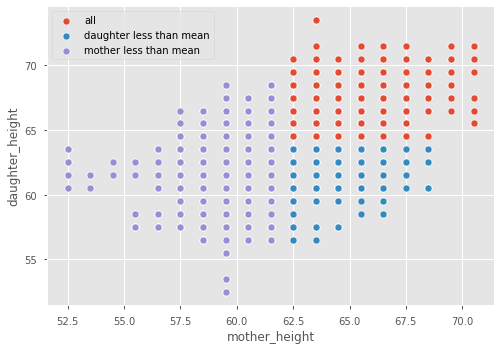

In [66]:
sns.scatterplot(x = 'mother_height', y = 'daughter_height', data = height_data, label = 'all')
sns.scatterplot(x = 'mother_height', y = 'daughter_height', data = daughter_less_mean, label='daughter less than mean')
sns.scatterplot(x = 'mother_height', y = 'daughter_height', data = mother_less_mean, label='mother less than mean')


Select on y would change your fit parameters because you are reducing the variations in the depedent variable, whereas select on x does not affect the variation of the distribution

# 6.8 Regression to the mean with fake data

In [97]:
def pilot_sim(n, ability, noise):
    if not isinstance(ability, dict):
        raise ValueError("ability has to be a dict {'mean': mean_val, 'sigma': sigma_val}")
    if not isinstance(noise, list):
        raise ValueError("noise has to be a list [sigma_1, sigma_2]")
    true_ability = np.random.normal(ability['mean'], ability['sigma'], n)
    noise_1 = np.random.normal(0, noise[0], n)
    noise_2 = np.random.normal(0, noise[1], n)
    man_1 = np.where(true_ability+noise_1>10, 10, np.where(true_ability+noise_1<0, 0, true_ability+noise_1))
    man_2 = np.where(true_ability+noise_2>10, 10, np.where(true_ability+noise_2<0, 0, true_ability+noise_2))
    praise = np.where(man_1>7, 1, 0)
    scold = np.where(man_1 < 3, 1, 0)
    df = pd.DataFrame({'true_ability': true_ability, 'noise_1': noise_1, 'noise_2': noise_2, 'maneuver_1':man_1, 'maneuver_2': man_2, 'praise': praise, 'scold':scold})
    return df

In [115]:
df = pilot_sim(500, {'mean':5, 'sigma':2}, [1, 1])

In [116]:
df

,true_ability,noise_1,noise_2,maneuver_1,maneuver_2,praise,scold
0,6.302779,0.545276,-1.752395,6.848054,4.550383,0,0
1,1.885778,-0.142279,-1.200519,1.743499,0.685259,0,1
2,6.471224,1.824424,-0.829915,8.295648,5.641309,1,0
3,6.146778,-0.187616,0.801769,5.959162,6.948547,0,0
4,4.082297,-0.363244,-0.490802,3.719052,3.591495,0,0
...,...,...,...,...,...,...,...
495,6.581456,-0.247392,0.544571,6.334064,7.126027,0,0
496,2.809293,2.220288,-0.256149,5.029581,2.553144,0,0
497,8.439962,0.752171,-0.990416,9.192133,7.449546,1,0
498,5.238867,-0.559863,0.907442,4.679004,6.146309,0,0


In [117]:
df['reinforcement'] = np.where(df['praise']==1, 'praise', np.where(df['scold']==1, 'scold', 'no reaction'))

In [118]:
df[['praise', 'scold','reinforcement']]

,praise,scold,reinforcement
0,0,0,no reaction
1,0,1,scold
2,1,0,praise
3,0,0,no reaction
4,0,0,no reaction
...,...,...,...
495,0,0,no reaction
496,0,0,no reaction
497,1,0,praise
498,0,0,no reaction


In [119]:
sum(df['scold'])

84

In [120]:
sum(df['praise'])

80

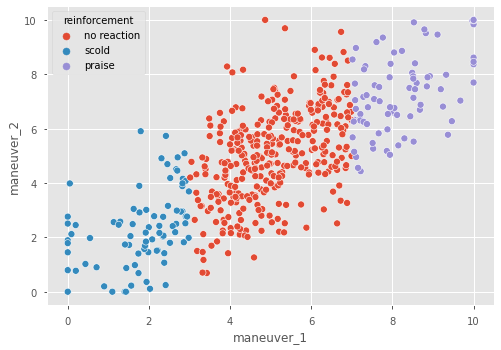

In [121]:
sns.scatterplot(x = 'maneuver_1', y = 'maneuver_2', hue = 'reinforcement', data = df)

In [122]:
no_reaction = df.query("reinforcement == 'no reaction'").copy()
np.mean(no_reaction['maneuver_2'] - no_reaction['maneuver_1'])

-0.031923422283624735

In [123]:
praise = df.query("reinforcement == 'praise'").copy()
np.mean(praise['maneuver_2'] - praise['maneuver_1'])

-0.9122267020953654

In [124]:
scold = df.query("reinforcement == 'scold'").copy()
np.mean(scold['maneuver_2'] - scold['maneuver_1'])

0.4669263843486379

This is again, the result of `regression to the mean`. The true ability of the pilots did not change, but there were variations added. The pilots who are indeed above average (praise) group must have also gotten "lucky" with the variation to be exceptionally good in the first maneuver. So they would still perform better than average on the second maneuver, but worse than the first one; Similarly, the pilots who are worse than avearge in true ability also needs to be unlucky to get scolded on the first maneuver to score so low, and therefore in the second one, they are more likely to go towards the mean.